In [ ]:
import pickle
from scipy import sparse
with open('datasets/ipsc_sP.pickle','rb') as f:
  sP = pickle.load(f)
%load_ext autoreload
%autoreload 2

In [ ]:
sP

<220450x220450 sparse matrix of type '<class 'numpy.float64'>'
	with 5479282 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy import sparse

In [ ]:
from diffusion_curvature.differentiable_laziness import curvature
from diffusion_curvature.datasets import torus
from diffusion_curvature.core import plot_3d
from diffusion_curvature.core import DiffusionMatrix

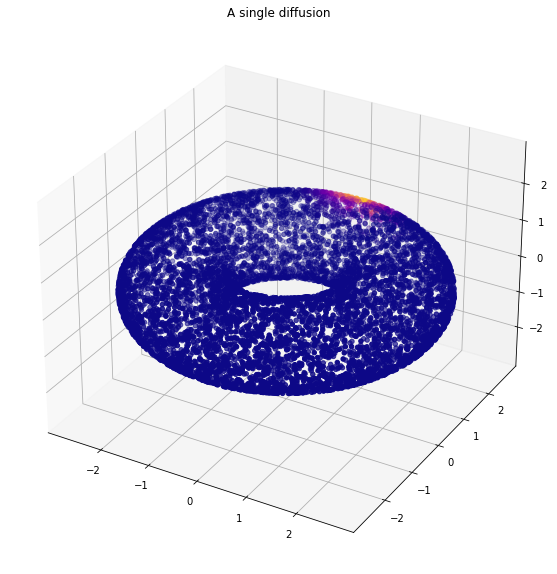

In [ ]:
X,ks = torus(n=16000)
P_anis = DiffusionMatrix(X,kernel_type="anisotropic", sigma=0.4)
plot_3d(X,P_anis[0],"A single diffusion")

In [ ]:
import numpy as np
P_powered = np.linalg.matrix_power(P_anis,32)

In [ ]:
from scipy.sparse import csr_array
P_powered = csr_array(P_powered)
P = csr_array(P_anis)

In [ ]:
ls = curvature(P, precomputed_powered_P=P_powered,aperture=20,smoothing=True)

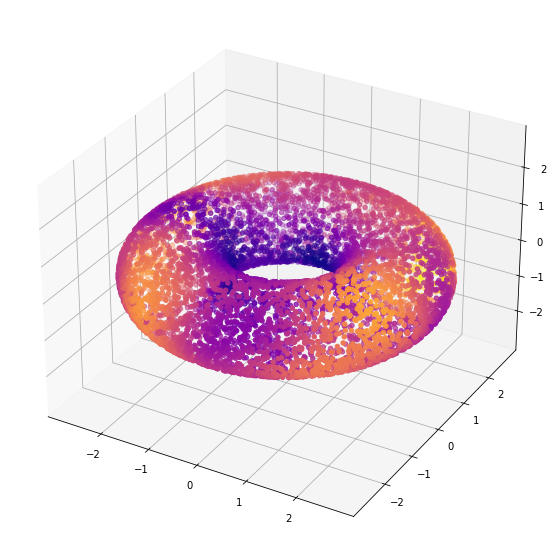

In [ ]:
plot_3d(X,ls)

In [ ]:
P_powered.count_nonzero()

23843689

In [ ]:
from scipy.sparse import bsr_array, csr_matrix, csr_array
P_powered = csr_array(P_powered)
P = csr_array(P_anis)

In [ ]:
precomputed_powered_P = P_powered
aperture = 20
smoothing = True
sample_number = 100
row_partitions = np.empty(sample_number)
for idx, i in enumerate(np.random.randint(P.shape[0], size=(sample_number))):
  row_partitions[idx] = np.partition(P.getrow(i).data,-aperture)[-aperture]
P_threshold = np.mean(row_partitions)
# Calculate thresholded values, as a mask of 0s and 1s
P_thresholded = (P >= P_threshold).astype(int)

In [ ]:
if precomputed_powered_P is not None:
		P_powered = precomputed_powered_P
near_neighbors_only = P_powered * P_thresholded
laziness_aggregate = np.sum(near_neighbors_only,axis=1)
  

In [ ]:
laziness_aggregate

array([0.00800709, 0.00647489, 0.01190517, ..., 0.0034653 , 0.0076483 ,
       0.01354584])